In [121]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [122]:
img = cv2.imread('./test_images/rafa.jpg')
img.shape

(3648, 5472, 3)

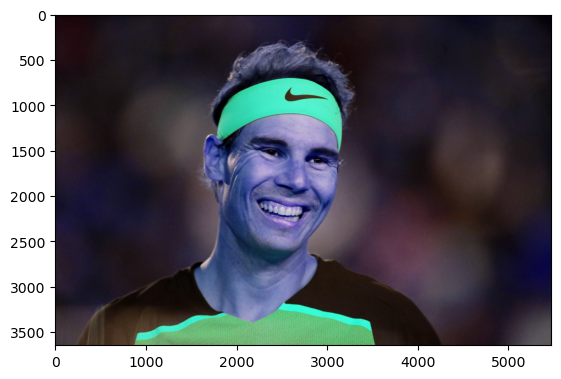

In [123]:
plt.imshow(img)

In [124]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(3648, 5472)

In [125]:
gray

array([[ 7,  6,  5, ...,  1,  2,  2],
       [ 5,  4,  4, ...,  1,  1,  2],
       [ 6,  5,  5, ...,  2,  2,  2],
       ...,
       [56, 58, 59, ..., 86, 90, 94],
       [53, 56, 59, ..., 85, 88, 90],
       [54, 57, 59, ..., 86, 88, 90]], dtype=uint8)

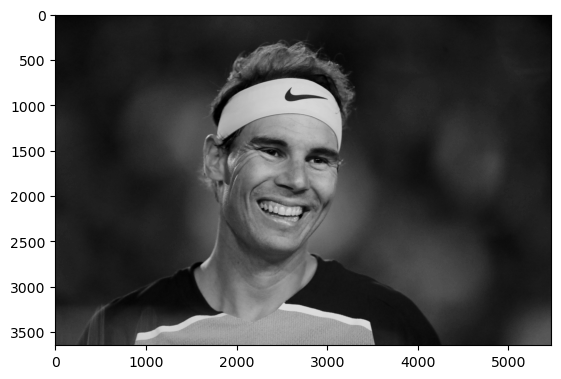

In [126]:
plt.imshow(gray, cmap='gray')

In [127]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[1844,  891, 1637, 1637]])

In [128]:
(x,y,w,h)=faces[0]
x,y,w,h

(1844, 891, 1637, 1637)

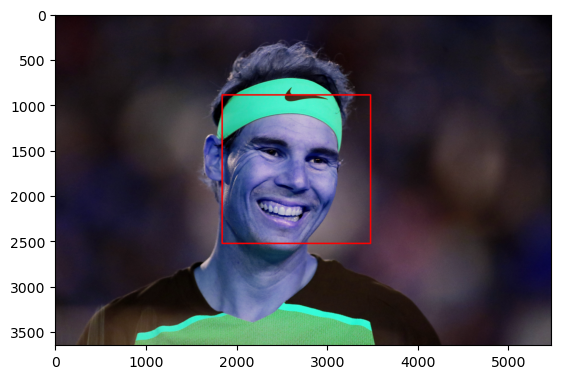

In [129]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),15)
plt.imshow(face_img)

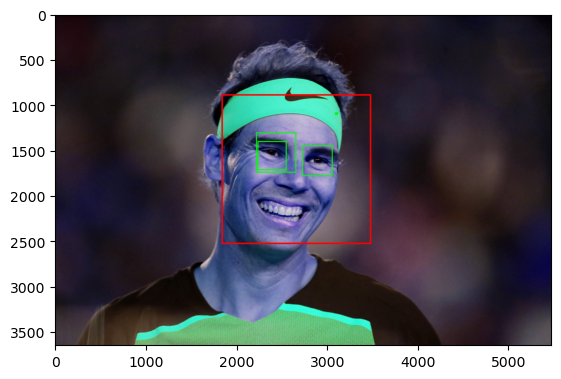

In [130]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),10)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

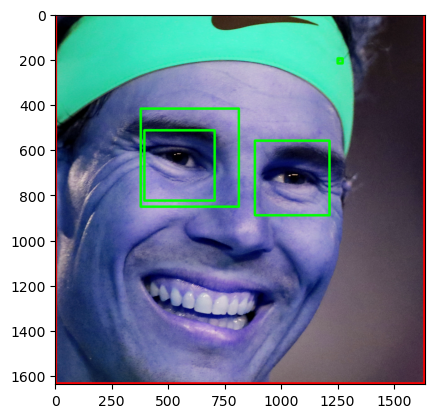

In [131]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [132]:
cropped_img = np.array(roi_color)
cropped_img.shape

(1637, 1637, 3)

In [133]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

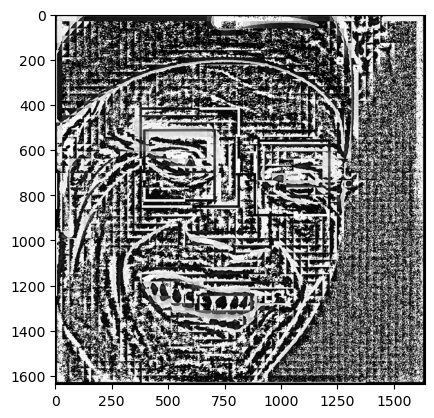

In [134]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [135]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

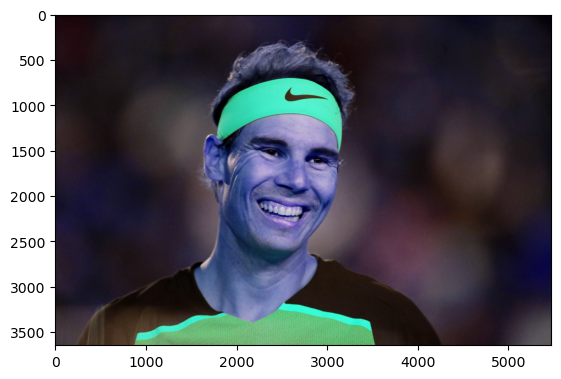

In [136]:
original_image = cv2.imread('./test_images/rafa.jpg')
plt.imshow(original_image)

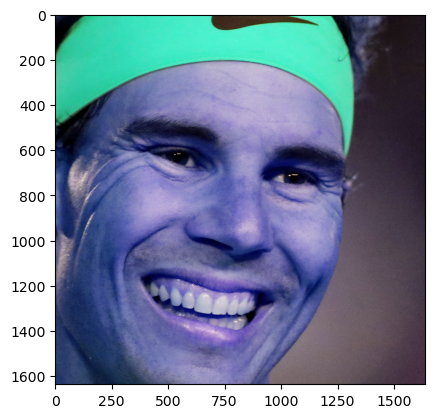

In [137]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/rafa.jpg')
plt.imshow(cropped_image)

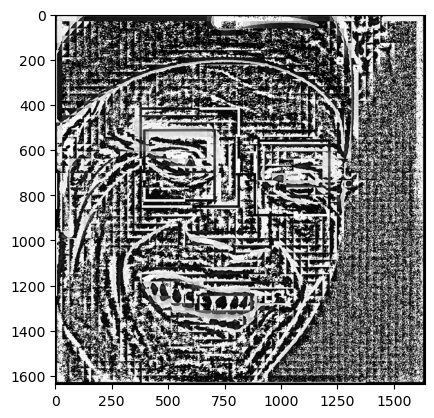

In [153]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

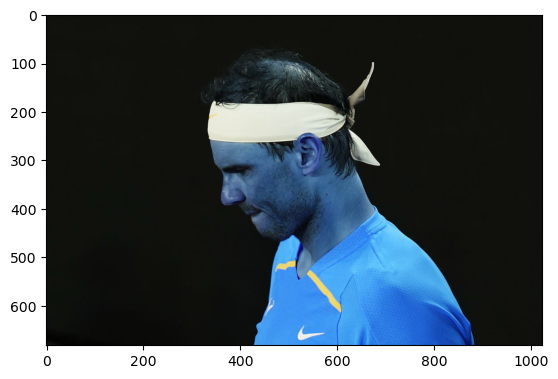

In [138]:
org_image_obstructed = cv2.imread('./test_images/rafa2.jpg')
plt.imshow(org_image_obstructed)

In [139]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/rafa2.jpg')
cropped_image_no_2_eyes

In [140]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [141]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [142]:
img_dirs

['./dataset/AB De',
 './dataset/Kaka',
 './dataset/Kohli',
 './dataset/Mathews',
 './dataset/Nadal']

In [143]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [144]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

AB De
Generating cropped images in folder:  ./dataset/cropped/AB De
Kaka
Generating cropped images in folder:  ./dataset/cropped/Kaka
Kohli
Generating cropped images in folder:  ./dataset/cropped/Kohli
Mathews
Generating cropped images in folder:  ./dataset/cropped/Mathews
Nadal
Generating cropped images in folder:  ./dataset/cropped/Nadal


In [145]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'AB De': ['./dataset/cropped/AB De\\AB De1.png',
  './dataset/cropped/AB De\\AB De10.png',
  './dataset/cropped/AB De\\AB De11.png',
  './dataset/cropped/AB De\\AB De12.png',
  './dataset/cropped/AB De\\AB De13.png',
  './dataset/cropped/AB De\\AB De14.png',
  './dataset/cropped/AB De\\AB De15.png',
  './dataset/cropped/AB De\\AB De16.png',
  './dataset/cropped/AB De\\AB De17.png',
  './dataset/cropped/AB De\\AB De2.png',
  './dataset/cropped/AB De\\AB De3.png',
  './dataset/cropped/AB De\\AB De4.png',
  './dataset/cropped/AB De\\AB De5.png',
  './dataset/cropped/AB De\\AB De6.png',
  './dataset/cropped/AB De\\AB De7.png',
  './dataset/cropped/AB De\\AB De8.png',
  './dataset/cropped/AB De\\AB De9.png'],
 'Kaka': ['./dataset/cropped/Kaka\\Kaka1.png',
  './dataset/cropped/Kaka\\Kaka10.png',
  './dataset/cropped/Kaka\\Kaka11.png',
  './dataset/cropped/Kaka\\Kaka12.png',
  './dataset/cropped/Kaka\\Kaka13.png',
  './dataset/cropped/Kaka\\Kaka14.png',
  './dataset/cropped/Kaka\\Kaka15.png'

In [146]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'AB De': 0, 'Kaka': 1, 'Kohli': 2, 'Mathews': 3, 'Nadal': 4}

In [147]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [150]:
X[0]

array([[14],
       [18],
       [21],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=uint8)

In [154]:
y[0]

0

In [152]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(141, 4096)

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

In [ ]:
print(classification_report(y_test, pipe.predict(X_test)))

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [ ]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [ ]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

In [ ]:
best_estimators

In [ ]:

best_estimators['svm'].score(X_test,y_test)

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

In [ ]:
best_estimators['logistic_regression'].score(X_test,y_test)

In [ ]:
best_clf = best_estimators['logistic_regression']

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
class_dict

In [ ]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

In [ ]:

import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))